# Συγκρίσεις pushover sap vs etabs. Default hinges

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

## Καμπύλες αντίστασης

In [3]:
sap_curve = pd.read_excel('sap/01_sap_auto.xlsx', skiprows=[0,2], usecols=[0,1,2])

sap_d = sap_curve['Displacement'].tolist()
sap_V = sap_curve['BaseForce'].tolist()

In [2]:
etabs_curve = pd.read_csv('etabs/01_defaults.pushcurve', skiprows=7,
                          sep='\s+')
etabs_d = etabs_curve['Displacement'].tolist()
etabs_V = etabs_curve['Base'].tolist()

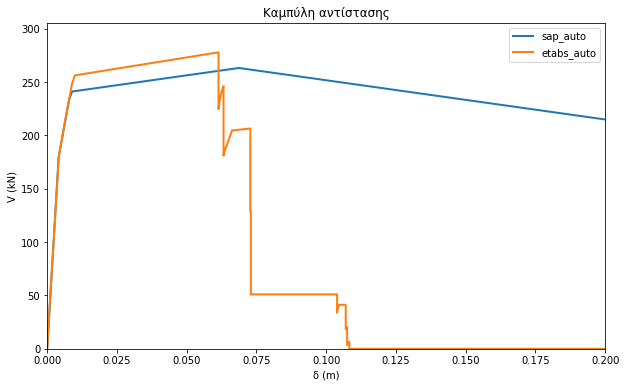

In [12]:
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(sap_d, sap_V, label="sap_auto", lw=2)
ax.plot(etabs_d, etabs_V, label="etabs_auto", lw=2)
# ax.plot(etabs_d, etabs_V, label="etabs", lw=2)
ax.axis([0, 0.20, 0, 1.1 * max(max(etabs_V), max(sap_V))])
ax.set_title('Καμπύλη αντίστασης')
ax.set_ylabel('V (kN)')
ax.set_xlabel('δ (m)')
ax.legend()
fig = (f, ax)
plt.show()

## Παρατηρήσεις

### Αντοχή

Υπάρχει μια μικρή διαφοροποίηση στην αντοχή των υποστυλωμάτων όπως φαίνεται και στα screenshots στα επιμέρους notebooks. Στo Sap οι πλαστικές αρθρώσεις στα υποστυλώματα υπολογίζονται με μεγαλύτερη λεπτομέρεια, λαμβάνοντας υπόψη περισσότερες παραμέτρους σε σύγκριση με το etabs (...στις εκδόσεις τους που χρησιμοποιήθηκαν εδώ).

### Πλαστιμότητα

Το Sap2000 δεν ακολουθεί πλήρως τα διαγράμματα Μ-θ των δεδομένων (βλ. [εδώ](sap_01_auto.ipynb#%CE%94%CE%B9%CE%B1%CE%B3%CF%81%CE%AC%CE%BC%CE%BC%CE%B1%CF%84%CE%B1-%CE%9C-%CE%B8)), με αποτέλεσμα η καμπύλη αντίστασης να έχει πολύ ομαλή πτώση από τη στιγμή που αρχίζουν να εμφανίζονται οι πτώσεις αντοχής στα δομικά στοιχεία.